In [20]:
# %load assignment4.py
import pandas as pd
import numpy as np
import scipy.io
import random, math
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.manifold import Isomap
%matplotlib inline

After having a brief conversation with Joshua Tenenbaum, the primary creator of the isometric feature mapping algorithm, it only seems right that we make your first lab assignment be replicating his canonical, dimensionality reduction research experiment for visual perception! In fact, you will also be using his original dataset from December 2000. 

*   It consists of 698 samples of 4096-dimensional vectors. 
*   These vectors are the coded brightness values of 64x64-pixel heads that have been rendered facing various directions and lighted from many angles. 

Replicate Dr. Tenenbaum's experiment by:

1. Applying both PCA and Isomap to the 698 raw images to derive 2D principal components and a 2D embedding of the data's intrinsic geometric structure.
2. Project both onto a 2D scatter plot, with a few superimposed face images on the associated samples.
3. Extra: If you're feeling fancy, increase n_components to three, and plot your scatter plot on a 3D chart.

In [17]:
64*64 # So it is one byte of brightness per pixel in the 64x64 image

4096

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [11]:
def Plot2D(T, title, x, y, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

In [12]:
# A .MAT file is a .MATLAB file. The faces dataset could have came
# in through .png images, but we'll show you how to do that in
# anither lab. For now, you'll see how to import .mats:
mat = scipy.io.loadmat('Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

In [19]:
# scipy.io.loadmat?

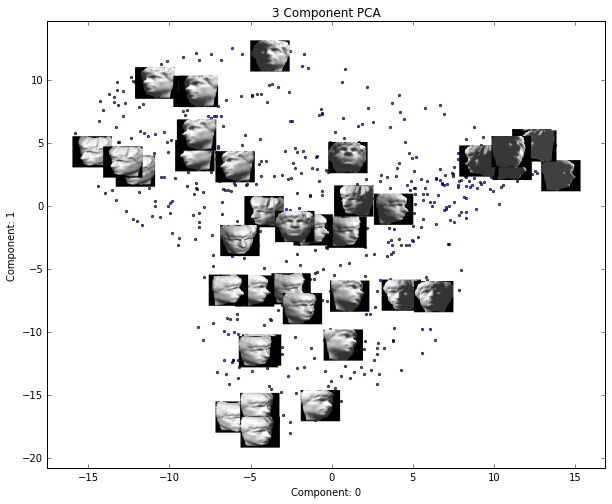

In [15]:
#
# TODO: Implement PCA here. Reduce the dataframe df down
# to THREE components. Once you've done that, call Plot2D.
#
# The format is: Plot2D(T, title, x, y, num_to_plot=40):
# T is your transformed data, NDArray.
# title is your chart title
# x is the principal component you want displayed on the x-axis, Can be 0 or 1
# y is the principal component you want displayed on the y-axis, Can be 1 or 2
#
# .. your code here ..
pca = PCA(n_components=3)
pca.fit(df)
T = pca.transform(df)
Plot2D(T, "3 Component PCA", 0, 1)
F = plt.gcf()
F.set_size_inches(10,8)
plt.show()

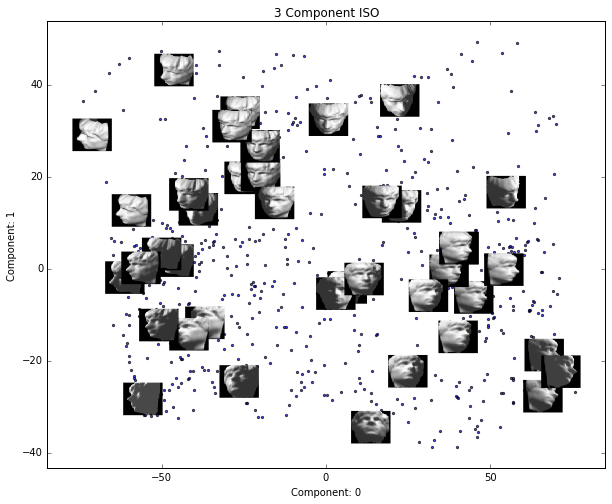

In [21]:
#
# TODO: Implement Isomap here. Reduce the dataframe df down
# to THREE components. Once you've done that, call Plot2D using
# the first two components.
#
# .. your code here ..
iso = Isomap(n_components=3)
iso.fit(df)
T = iso.transform(df)
Plot2D(T, "3 Component ISO", 0, 1)
F = plt.gcf()
F.set_size_inches(10,8)
plt.show()


### Questions

Alter your code to graph the second and third components (index=1 and 2) instead of the 0th and 1st, for both PCA and Isomap. Look *closely* at the Isomap plot. Can you tell what 'degree of freedom' the X axis represents?

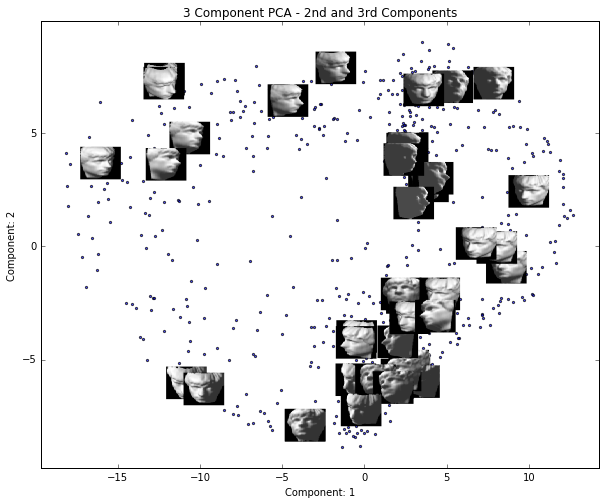

In [22]:
pca = PCA(n_components=3)
pca.fit(df)
T = pca.transform(df)
Plot2D(T, "3 Component PCA - 2nd and 3rd Components", 1, 2)
F = plt.gcf()
F.set_size_inches(10,8)
plt.show()

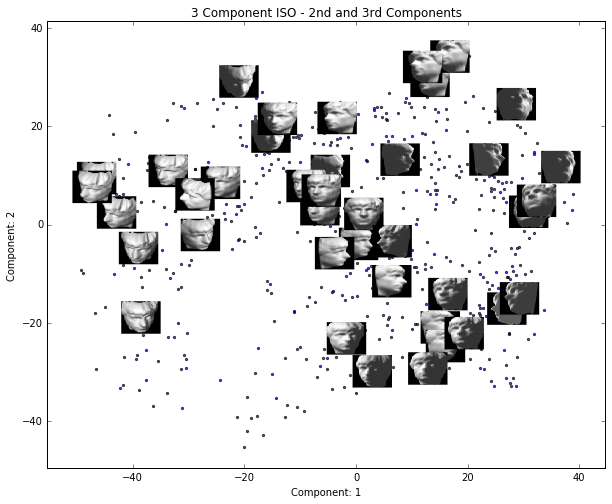

In [23]:
iso = Isomap(n_components=3)
iso.fit(df)
T = iso.transform(df)
Plot2D(T, "3 Component ISO - 2nd and 3rd Components", 1, 2)
F = plt.gcf()
F.set_size_inches(10,8)
plt.show()

#### In his experiment, Dr. Tenenbaum set his K-parameter (n_neighbors is SciKit-Learn) to 8. Try reducing that figure down to 3 and re-running your code. Does the X-Axis still represent the same degree of freedom?

>Note:  I don't see where the class said to use 8.  The default is 5 so that's what was used in the preceding.

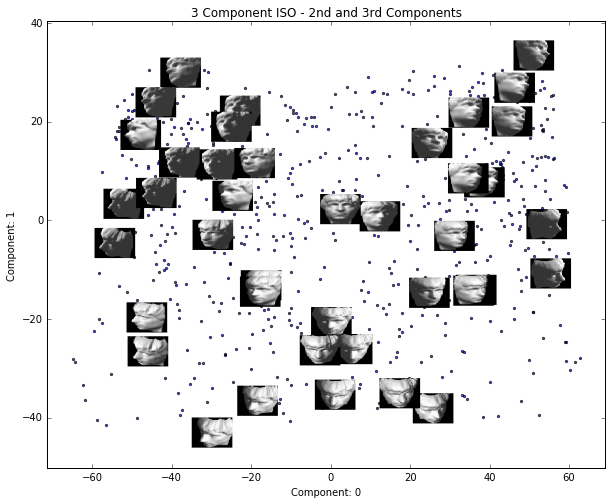

In [26]:
# First with 8 since the class never said to use 8
iso = Isomap(n_components=3, n_neighbors=8)
iso.fit(df)
T = iso.transform(df)
Plot2D(T, "3 Component ISO - 2nd and 3rd Components", 0, 1)
F = plt.gcf()
F.set_size_inches(10,8)
plt.show()

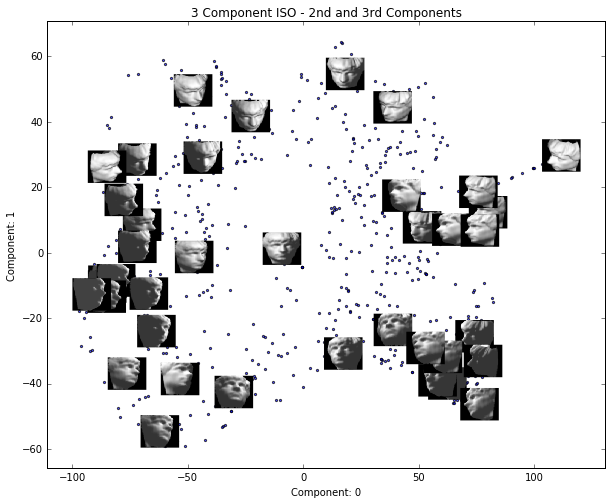

In [27]:
# First with 8 since the class never said to use 8
iso = Isomap(n_components=3, n_neighbors=3)
iso.fit(df)
T = iso.transform(df)
Plot2D(T, "3 Component ISO - 2nd and 3rd Components", 0, 1)
F = plt.gcf()
F.set_size_inches(10,8)
plt.show()

In [ ]:
#
# TODO: If you're up for a challenge, draw your dataframes in 3D
# Even if you're not, just do it anyway.
#
# .. your code here ..


plt.show()